# Distance Traveled Visualization Book

In [34]:
# Dependencies
import pandas as pd
import numpy as np
import os
import sys


path_to_team_table = os.path.join(os.getcwd(), '..', 'data', 'output', 'team_travel_summary_final_v1.csv')
team_df = pd.read_csv(path_to_table)

path_to_conf_table = os.path.join(os.getcwd(), '..', 'data', 'output', 'conference_travel_stats_v1.csv')
conf_df = pd.read_csv(path_to_conf_table)

team_df.head()
conf_df.head(6)

,Conference,AVG_Total_Trips,N_trips_AVG,N_total_distance_AVG,N_AVG,N_shortest_AVG,N_longest_AVG,non_con_trips_AVG,non_con_total_distance_AVG,non_con_AVG,non_con_shortest_AVG,non_con_longest_AVG,con_trips_AVG,con_total_distance_AVG,con_AVG,con_shortest_AVG,con_longest_AVG
0,atlantic,11.18,0.36,465.46,1280.03,465.46,465.46,3.00,792.11,264.04,127.38,502.69,7.82,3071.72,392.89,162.28,1244.12
1,big_ten,10.29,2.00,952.02,476.01,95.84,884.62,2.14,1379.59,643.81,327.15,1021.88,6.14,2032.64,330.89,153.12,616.01
2,ccha,10.00,0.78,293.35,377.16,88.23,250.01,2.56,1449.15,567.06,169.91,915.10,6.67,2173.39,326.01,124.21,582.66
3,ecac,14.25,0.75,458.19,610.92,30.70,433.56,2.33,424.15,181.78,80.92,245.56,11.17,1769.76,158.49,38.22,253.96
4,hockey_east,13.73,1.45,1468.11,1009.32,574.98,1183.25,2.18,828.59,379.77,140.65,649.66,10.09,864.14,85.64,44.87,215.91
5,independents,12.40,0.20,544.40,2721.99,544.40,544.40,12.20,15564.55,1275.78,196.60,2380.20,0.00,0.00,NaN,0.00,0.00


posx and posy should be finite values
posx and posy should be finite values


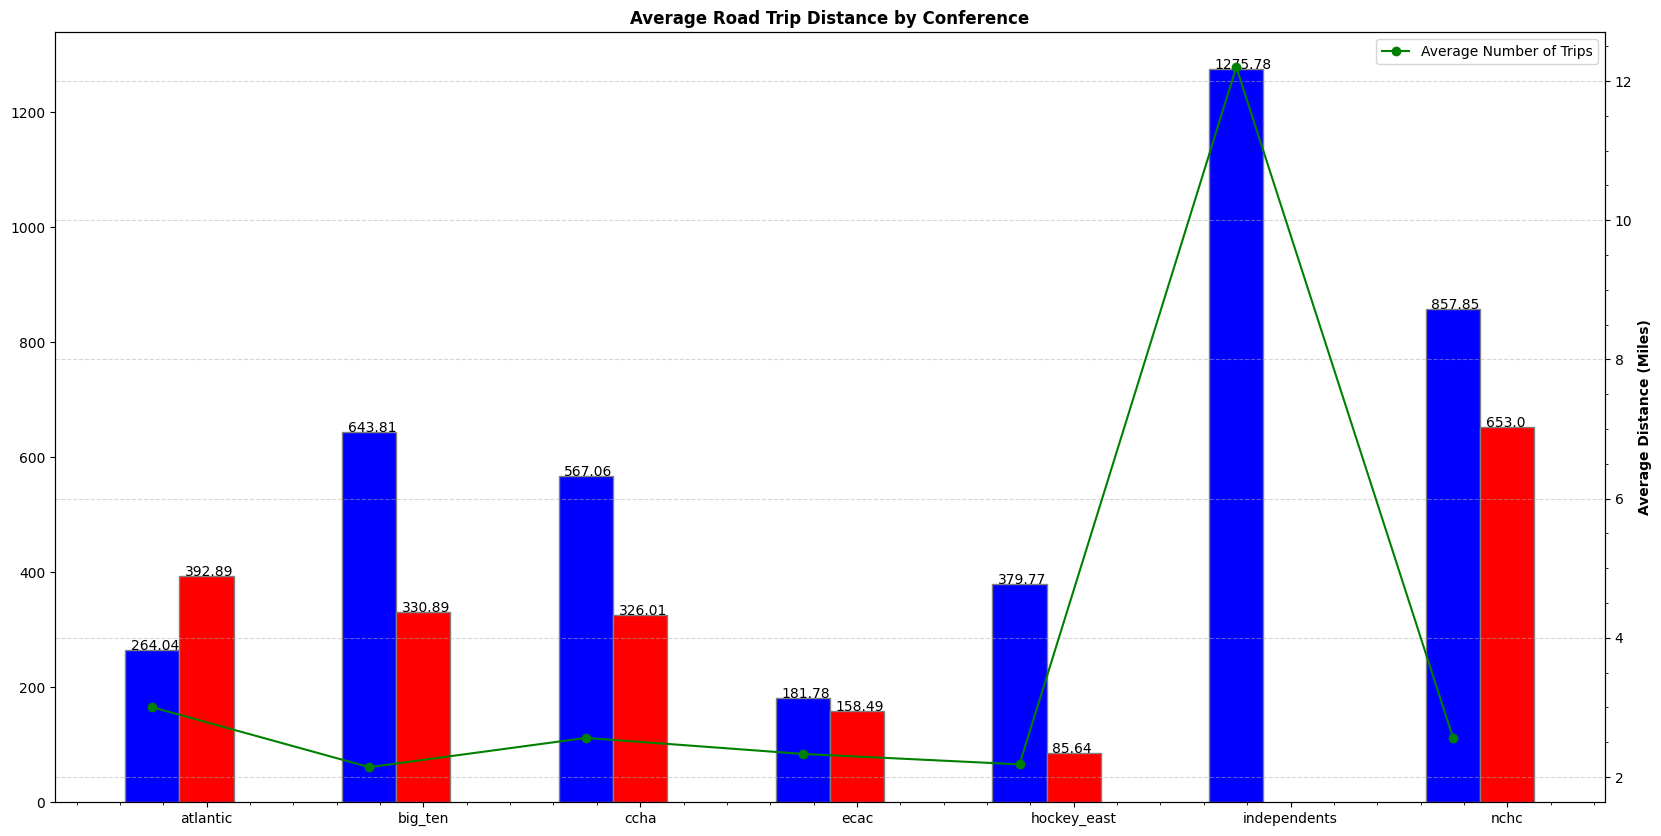

In [35]:
### Plot the average non conference and trip within the conference for each conference
import matplotlib.pyplot as plt

# Plot the average non conference and trip within the conference for each conference
# Create side by side bars for each conference
plt.figure(figsize=(20,10))
barWidth = 0.25
r1 = np.arange(len(conf_df['Conference']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, conf_df['non_con_AVG'], color='b', width=barWidth, edgecolor='grey', label='Average Non-Conference Road Trip')
plt.bar(r2, conf_df['con_AVG'], color='r', width=barWidth, edgecolor='grey', label='Average Conference Road Trip')

# place the numberical values on the bars
for i in range(len(r1)):
    plt.text(x=r1[i]-0.1, y=conf_df['non_con_AVG'][i]+0.5, s=round(conf_df['non_con_AVG'][i], 2), size=10)
    plt.text(x=r2[i]-0.1, y=conf_df['con_AVG'][i]+0.5, s=round(conf_df['con_AVG'][i], 2), size=10)

# add a second axis to plot the average number of trips per conference
plt.twinx()
plt.plot(r1, conf_df['non_con_trips_AVG'], color='g', marker='o', label='Average Number of Trips')

# Labels and Title
plt.xlabel('Conference', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(conf_df['Conference']))], conf_df['Conference'])
plt.ylabel('Average Distance (Miles)', fontweight='bold')

# Add Grid Lines behind bars
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Minor ticks
plt.minorticks_on()


plt.title('Average Road Trip Distance by Conference', fontweight='bold')
plt.legend()
plt.show()

